<i>Copyright (c) Microsoft Corporation. All rights reserved.</i>

<i>Licensed under the MIT License.</i>

# Testing different Hyperparameters and Benchmarking

In this notebook, we'll cover how to test different hyperparameters for a particular dataset and how to benchmark different parameters across a group of datasets. Note that this re-uses functionality which was already introduced and described in the [classification/notebooks/11_exploring_hyperparameters.ipynb](../../classification/notebooks/11_exploring_hyperparameters.ipynb) notebook. **Please refer to that notebook for all explanations, which this notebook will not repeat.**

For an example of how to scale up with remote GPU clusters on Azure Machine Learning, please view [24_exploring_hyperparameters_on_azureml.ipynb](../../classification/notebooks/24_exploring_hyperparameters_on_azureml.ipynb).

## Testing hyperparameters

Ensure edits to libraries are loaded and plotting is shown in the notebook.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

We start by importing the utilities we need.

In [2]:
import sys
import numpy as np
import scrapbook as sb
import torch
import fastai
from fastai.vision import *

sys.path.append("../../")
from utils_cv.common.data import unzip_url
from utils_cv.classification.parameter_sweeper import ParameterSweeper, clean_sweeper_df, plot_sweeper_df
from utils_cv.segmentation.data import Urls

fastai.__version__

/home/saylibapat/miniconda3/envs/cv/lib/python3.7/site-packages/scrapbook/__init__.py:8: FutureWarning: 'nteract-scrapbook' package has been renamed to `scrapbook`. No new releases are going out for this old package name.
  warnings.warn("'nteract-scrapbook' package has been renamed to `scrapbook`. No new releases are going out for this old package name.", FutureWarning)


'1.0.57'

Define the datasets and parameters we will use in this notebook. To run this notebook quickly, we are setting the image resolution and the number of epochs to be low. 

In [3]:
DATA_PATHS = [unzip_url(Urls.fridge_objects_path, exist_ok=True)]
REPS = 3
LEARNING_RATES = [1e-3, 1e-4, 1e-5]
IM_SIZES = [50, 100]   #recommended to try: [300, 500]
EPOCHS = [2,5]         #recommended to try: [10, 20]
DROPOUTS = [0]

### Model training and evaluation

We start by creating the Parameter Sweeper object. Before we start testing, it's a good idea to see what the default parameters are. We can use a the property `parameters` to easily see those default values.

In [4]:
sweeper = ParameterSweeper(metric_name="ratio_correct")
sweeper.parameters

OrderedDict([('learning_rate', [0.0001]),
             ('epochs', [15]),
             ('batch_size', [16]),
             ('im_size', [299]),
             ('architecture',
              [<Architecture.resnet18: functools.partial(<function resnet18 at 0x7fd2144c5170>)>]),
             ('transform', [True]),
             ('dropout', [0.5]),
             ('weight_decay', [0.01]),
             ('training_schedule',
              [<TrainingSchedule.head_first_then_body: 'head_first_then_body'>]),
             ('discriminative_lr', [False]),
             ('one_cycle_policy', [True])])

Now that we know the defaults, we can pass it the parameters we want to test, and run the parameter sweep.

In [5]:
sweeper.update_parameters(learning_rate=LEARNING_RATES, im_size=IM_SIZES, epochs=EPOCHS, dropout=DROPOUTS)
df = sweeper.run(datasets=DATA_PATHS, reps=REPS, learner_type = "unet")

Percentage done: 0%. Currently processing repeat 1 of 3, running 1 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.536469,0.898806,0.769743,00:08
1,1.184619,0.715016,0.775457,00:10


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 3%. Currently processing repeat 1 of 3, running 2 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.817760,1.374568,0.416540,00:35
1,1.363786,0.816734,0.747824,00:43


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 6%. Currently processing repeat 1 of 3, running 3 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.337755,1.012071,0.753771,00:16


epoch,train_loss,valid_loss,ratio_correct,time
0,0.830697,1.704688,0.756790,00:12
1,1.035528,0.644422,0.796876,00:10
2,0.839133,0.426249,0.833781,00:11
3,0.707323,0.374976,0.863438,00:11


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 8%. Currently processing repeat 1 of 3, running 4 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.269624,1.145633,0.741471,00:31


epoch,train_loss,valid_loss,ratio_correct,time
0,0.871989,4.878623,0.754126,00:36
1,1.311288,0.811195,0.834686,00:42
2,1.025714,0.404431,0.860740,00:44
3,0.828547,0.334357,0.873036,00:39


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 11%. Currently processing repeat 1 of 3, running 5 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.094311,1.174557,0.693543,00:14
1,1.599795,1.000012,0.728590,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 14%. Currently processing repeat 1 of 3, running 6 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.847314,1.138779,0.697512,00:39
1,1.999736,1.073426,0.741291,00:40


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 17%. Currently processing repeat 1 of 3, running 7 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.712653,1.546306,0.327095,00:14


epoch,train_loss,valid_loss,ratio_correct,time
0,1.572750,1.183622,0.666105,00:14
1,1.320230,0.890422,0.770305,00:14
2,1.124540,0.642044,0.808257,00:15
3,0.994782,0.618694,0.815419,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 19%. Currently processing repeat 1 of 3, running 8 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.491247,0.976924,0.759714,00:37


epoch,train_loss,valid_loss,ratio_correct,time
0,0.989472,0.761222,0.774555,00:51
1,0.821421,0.479552,0.827529,01:04
2,0.698261,0.443821,0.858433,00:50
3,0.612202,0.389291,0.865510,00:48


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 22%. Currently processing repeat 1 of 3, running 9 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.805485,1.521947,0.332314,00:15
1,1.642925,1.410834,0.473229,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 25%. Currently processing repeat 1 of 3, running 10 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.347470,1.652277,0.166940,00:39
1,2.034237,1.355146,0.443557,00:41


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 28%. Currently processing repeat 1 of 3, running 11 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.721045,1.473483,0.399048,00:13


epoch,train_loss,valid_loss,ratio_correct,time
0,1.607583,1.439258,0.439810,00:14
1,1.538219,1.299362,0.557819,00:14
2,1.464373,1.210410,0.625124,00:15
3,1.411396,1.186562,0.643019,00:15


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 31%. Currently processing repeat 1 of 3, running 12 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.827943,1.392502,0.580021,00:43


epoch,train_loss,valid_loss,ratio_correct,time
0,1.643975,1.334196,0.644971,00:42
1,1.537004,1.226639,0.731676,00:44
2,1.440624,1.169587,0.750443,00:38
3,1.377570,1.159183,0.752974,00:39


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 33%. Currently processing repeat 2 of 3, running 1 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.743265,1.318033,0.489543,00:13
1,1.397947,0.911740,0.784048,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 36%. Currently processing repeat 2 of 3, running 2 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.721420,0.924874,0.757886,00:40
1,1.270205,0.723089,0.760743,00:36


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 39%. Currently processing repeat 2 of 3, running 3 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.153063,1.002384,0.742657,00:12


epoch,train_loss,valid_loss,ratio_correct,time
0,0.979733,0.694779,0.769667,00:19
1,0.857125,0.750755,0.776991,00:14
2,0.781347,0.517960,0.798133,00:13
3,0.685309,0.413752,0.841638,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 42%. Currently processing repeat 2 of 3, running 4 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,8.175098,1.372808,0.514595,00:39


epoch,train_loss,valid_loss,ratio_correct,time
0,1.061324,0.616470,0.814783,00:37
1,2.068597,0.754698,0.813281,00:43
2,1.514001,0.419723,0.848248,00:36
3,1.186858,0.390268,0.860802,00:35


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 44%. Currently processing repeat 2 of 3, running 5 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.699414,1.561037,0.277743,00:15
1,1.990943,1.131899,0.638086,00:13


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 47%. Currently processing repeat 2 of 3, running 6 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.630538,1.444071,0.346017,00:40
1,1.922544,1.173938,0.712724,00:36


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 50%. Currently processing repeat 2 of 3, running 7 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.221694,1.381346,0.363724,00:15


epoch,train_loss,valid_loss,ratio_correct,time
0,1.379478,1.062057,0.688762,00:15
1,1.121322,0.657585,0.786114,00:15
2,0.938575,0.541731,0.821905,00:13
3,0.824494,0.518898,0.824381,00:15


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 53%. Currently processing repeat 2 of 3, running 8 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.018808,1.163550,0.640079,00:33


epoch,train_loss,valid_loss,ratio_correct,time
0,1.218544,0.867370,0.743081,00:41
1,0.959059,0.570264,0.818307,00:40
2,0.787101,0.413109,0.848357,00:39
3,0.685165,0.407057,0.851529,00:37


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 56%. Currently processing repeat 2 of 3, running 9 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.926323,2.192117,0.075952,00:15
1,2.611839,1.927898,0.089476,00:21


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 58%. Currently processing repeat 2 of 3, running 10 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.735786,1.988275,0.061714,00:39
1,2.498692,1.854838,0.069055,00:42


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 61%. Currently processing repeat 2 of 3, running 11 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.344368,1.149657,0.732095,00:14


epoch,train_loss,valid_loss,ratio_correct,time
0,1.267005,1.141627,0.734219,00:16
1,1.229147,1.084392,0.746248,00:15
2,1.189924,1.028814,0.754886,00:16
3,1.156546,1.008627,0.757448,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 64%. Currently processing repeat 2 of 3, running 12 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.615542,1.315891,0.557590,00:35


epoch,train_loss,valid_loss,ratio_correct,time
0,1.374894,1.256575,0.612712,00:38
1,1.312154,1.129481,0.688124,00:39
2,1.234645,1.049750,0.712814,00:39
3,1.174384,1.030321,0.717040,00:39


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 67%. Currently processing repeat 3 of 3, running 1 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.611279,1.374107,0.762924,00:14
1,1.216045,0.730535,0.776495,00:15


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 69%. Currently processing repeat 3 of 3, running 2 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.878436,1.226483,0.621745,00:36
1,1.313544,0.806801,0.802357,00:40


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 72%. Currently processing repeat 3 of 3, running 3 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.927409,0.996027,0.769610,00:13


epoch,train_loss,valid_loss,ratio_correct,time
0,0.975907,0.653625,0.780390,00:14
1,0.845469,0.486273,0.801848,00:14
2,0.695776,0.327684,0.893619,00:14
3,0.589992,0.293182,0.898314,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 75%. Currently processing repeat 3 of 3, running 4 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,5.415966,1.171564,0.753371,00:35


epoch,train_loss,valid_loss,ratio_correct,time
0,0.951888,1.828860,0.298938,00:37
1,0.995653,0.492651,0.784848,00:39
2,0.781741,0.325780,0.877138,00:38
3,0.650518,0.301375,0.881845,00:41


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 78%. Currently processing repeat 3 of 3, running 5 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.197057,0.896939,0.745124,00:15
1,0.958184,0.765538,0.781933,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 81%. Currently processing repeat 3 of 3, running 6 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.465242,1.015522,0.749562,00:36
1,1.171627,0.827536,0.763010,00:35


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 83%. Currently processing repeat 3 of 3, running 7 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.407263,1.055553,0.742543,00:13


epoch,train_loss,valid_loss,ratio_correct,time
0,1.070040,1.008282,0.742667,00:14
1,0.906594,0.628291,0.798209,00:14
2,0.768578,0.552539,0.809010,00:15
3,0.683228,0.488475,0.825267,00:14


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 86%. Currently processing repeat 3 of 3, running 8 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.981089,1.266143,0.722098,00:57


epoch,train_loss,valid_loss,ratio_correct,time
0,1.156341,0.941204,0.736617,00:43
1,0.952510,0.687032,0.768957,00:42
2,0.810621,0.543643,0.828269,00:45
3,0.718722,0.496618,0.830660,00:42


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 89%. Currently processing repeat 3 of 3, running 9 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.038208,1.694481,0.190152,00:18
1,1.915470,1.614818,0.258438,00:22


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 92%. Currently processing repeat 3 of 3, running 10 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.616034,1.899222,0.150900,00:41
1,2.352807,1.707163,0.257267,00:46


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 94%. Currently processing repeat 3 of 3, running 11 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,2.669479,1.960437,0.058695,00:19


epoch,train_loss,valid_loss,ratio_correct,time
0,2.364047,1.843645,0.080819,00:15
1,2.171239,1.574815,0.280810,00:13
2,1.968074,1.428769,0.474390,00:12
3,1.841087,1.405613,0.513562,00:13


this Learner object self-destroyed - it still exists, but no longer usable
Percentage done: 97%. Currently processing repeat 3 of 3, running 12 of 12 permutations, dataset 1 of 1 (segFridgeObjects). 


epoch,train_loss,valid_loss,ratio_correct,time
0,1.760809,1.497381,0.225102,00:32


epoch,train_loss,valid_loss,ratio_correct,time
0,1.580722,1.417168,0.380655,00:41
1,1.482196,1.253301,0.648679,00:37
2,1.378425,1.138401,0.721700,00:34
3,1.301971,1.100791,0.731174,00:36


this Learner object self-destroyed - it still exists, but no longer usable


In [6]:
df

duration  \
0 PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects   20.912202   
  PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects   80.562554   
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects   63.425498   
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects  195.202613   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects   30.764143   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects   82.009600   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects   75.194820   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects  253.636448   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segFridgeObjects   32.515857   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segFridgeObjects   83.017282   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 5]|[... segFridgeObjects   76.303412   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 5]|[... segFridgeObjects  210.267768   
1 PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects   29.074236   
  PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects   78.590422   
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects   76.258740   
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects  193.363629   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects   30.231366   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects   78.989381   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects   76.576649   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects  193.346399   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segFridgeObjects   38.335855   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segFridgeObjects   84.549622   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 5]|[... segFridgeObjects   79.137965   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 5]|[... segFridgeObjects  194.275919   
2 PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects   32.133225   
  PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects   78.588386   
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects   72.217785   
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects  192.942642   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects   32.356007   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects   74.129962   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects   74.333845   
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects  234.686965   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segFridgeObjects   42.042660   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segFridgeObjects   90.844252   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 5]|[... segFridgeObjects   75.850312   
  PARAMETERS [learning_rate: 1e-05]|[epochs: 5]|[... segFridgeObjects  184.405985   

                                                                       ratio_correct  
0 PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects       0.775457  
  PARAMETERS [learning_rate: 0.001]|[epochs: 2]|[... segFridgeObjects       0.747824  
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects       0.863438  
  PARAMETERS [learning_rate: 0.001]|[epochs: 5]|[... segFridgeObjects       0.873036  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects       0.728590  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 2]|... segFridgeObjects       0.741291  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects       0.815419  
  PARAMETERS [learning_rate: 0.0001]|[epochs: 5]|... segFridgeObjects       0.865510  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segFridgeObjects       0.473229  
  PARAMETERS [learning_rate: 1e-05]|[epochs: 2]|[... segF

### Visualize Results <a name="visualize"></a>

When we read in multi-index dataframe, index 0 represents the run number, index 1 represents a single permutation of parameters, and index 2 represents the dataset. To see the results, show the df using the `clean_sweeper_df` helper function. This will display all the hyperparameters in a nice, readable way.

In [7]:
df = clean_sweeper_df(df)

Since we've run our benchmarking over 3 repetitions, we may want to just look at the averages across the different __run numbers__.

In [8]:
df.mean(level=(1,2)).T

/home/saylibapat/miniconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  """Entry point for launching an IPython kernel.


,P: [learning_rate: 0.001] [epochs: 2] [im_size: 50],P: [learning_rate: 0.001] [epochs: 2] [im_size: 100],P: [learning_rate: 0.001] [epochs: 5] [im_size: 50],P: [learning_rate: 0.001] [epochs: 5] [im_size: 100],P: [learning_rate: 0.0001] [epochs: 2] [im_size: 50],P: [learning_rate: 0.0001] [epochs: 2] [im_size: 100],P: [learning_rate: 0.0001] [epochs: 5] [im_size: 50],P: [learning_rate: 0.0001] [epochs: 5] [im_size: 100],P: [learning_rate: 1e-05] [epochs: 2] [im_size: 50],P: [learning_rate: 1e-05] [epochs: 2] [im_size: 100],P: [learning_rate: 1e-05] [epochs: 5] [im_size: 50],P: [learning_rate: 1e-05] [epochs: 5] [im_size: 100]
,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects,segFridgeObjects
duration,27.373221,79.247121,70.634008,193.836295,31.117172,78.376314,75.368438,227.223271,37.631457,86.137052,77.09723,196.316557
ratio_correct,0.778667,0.770308,0.867797,0.871894,0.716203,0.739008,0.821689,0.849233,0.273714,0.256626,0.63801,0.733729


Print the average accuracy over the different runs for each dataset independently.

/home/saylibapat/miniconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  """Entry point for launching an IPython kernel.


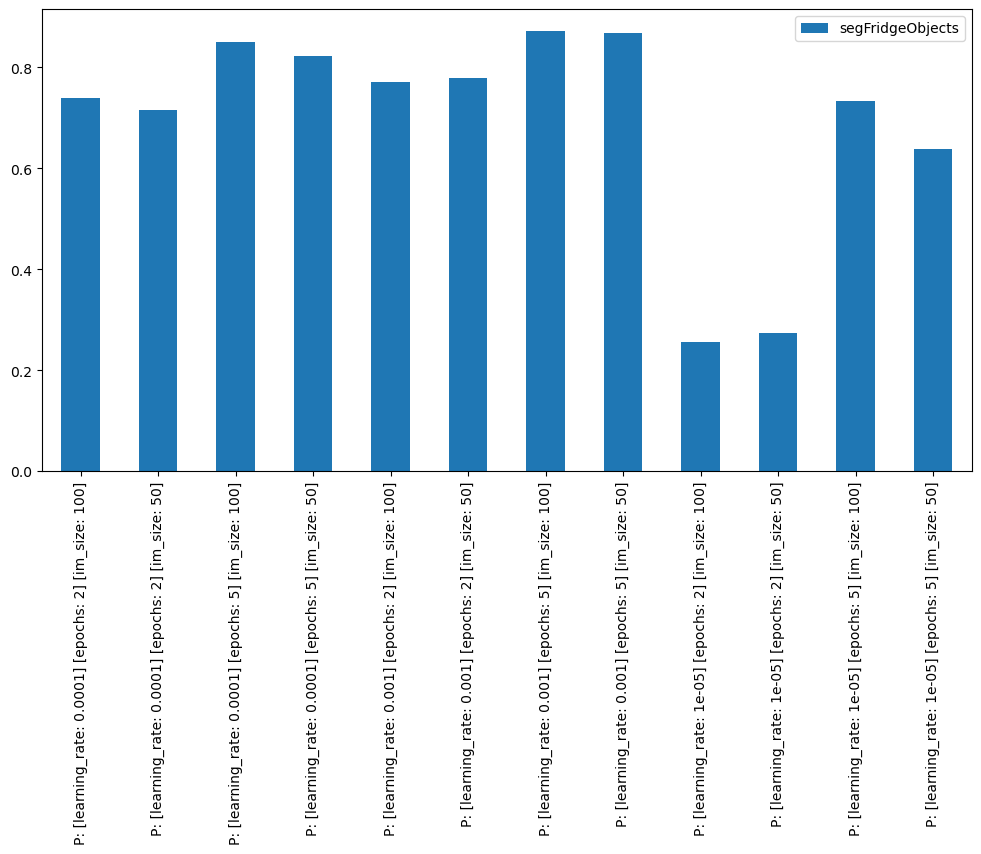

In [9]:
ax = df.mean(level=(1,2))["ratio_correct"].unstack().plot(kind='bar', figsize=(12, 6))

Additionally, we may want simply to see which set of hyperparameters perform the best across the different __datasets__. We can do that by averaging the results of the different datasets.

In [10]:
df.mean(level=(1)).T

/home/saylibapat/miniconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  """Entry point for launching an IPython kernel.


,P: [learning_rate: 0.001] [epochs: 2] [im_size: 50],P: [learning_rate: 0.001] [epochs: 2] [im_size: 100],P: [learning_rate: 0.001] [epochs: 5] [im_size: 50],P: [learning_rate: 0.001] [epochs: 5] [im_size: 100],P: [learning_rate: 0.0001] [epochs: 2] [im_size: 50],P: [learning_rate: 0.0001] [epochs: 2] [im_size: 100],P: [learning_rate: 0.0001] [epochs: 5] [im_size: 50],P: [learning_rate: 0.0001] [epochs: 5] [im_size: 100],P: [learning_rate: 1e-05] [epochs: 2] [im_size: 50],P: [learning_rate: 1e-05] [epochs: 2] [im_size: 100],P: [learning_rate: 1e-05] [epochs: 5] [im_size: 50],P: [learning_rate: 1e-05] [epochs: 5] [im_size: 100]
duration,27.373221,79.247121,70.634008,193.836295,31.117172,78.376314,75.368438,227.223271,37.631457,86.137052,77.09723,196.316557
ratio_correct,0.778667,0.770308,0.867797,0.871894,0.716203,0.739008,0.821689,0.849233,0.273714,0.256626,0.63801,0.733729


To make it easier to see which permutation did the best, we can plot the results using the `plot_sweeper_df` helper function. This plot will help us easily see which parameters offer the highest accuracies.

/home/saylibapat/miniconda3/envs/cv/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.median(level=1) should use df.groupby(level=1).median().
  """Entry point for launching an IPython kernel.


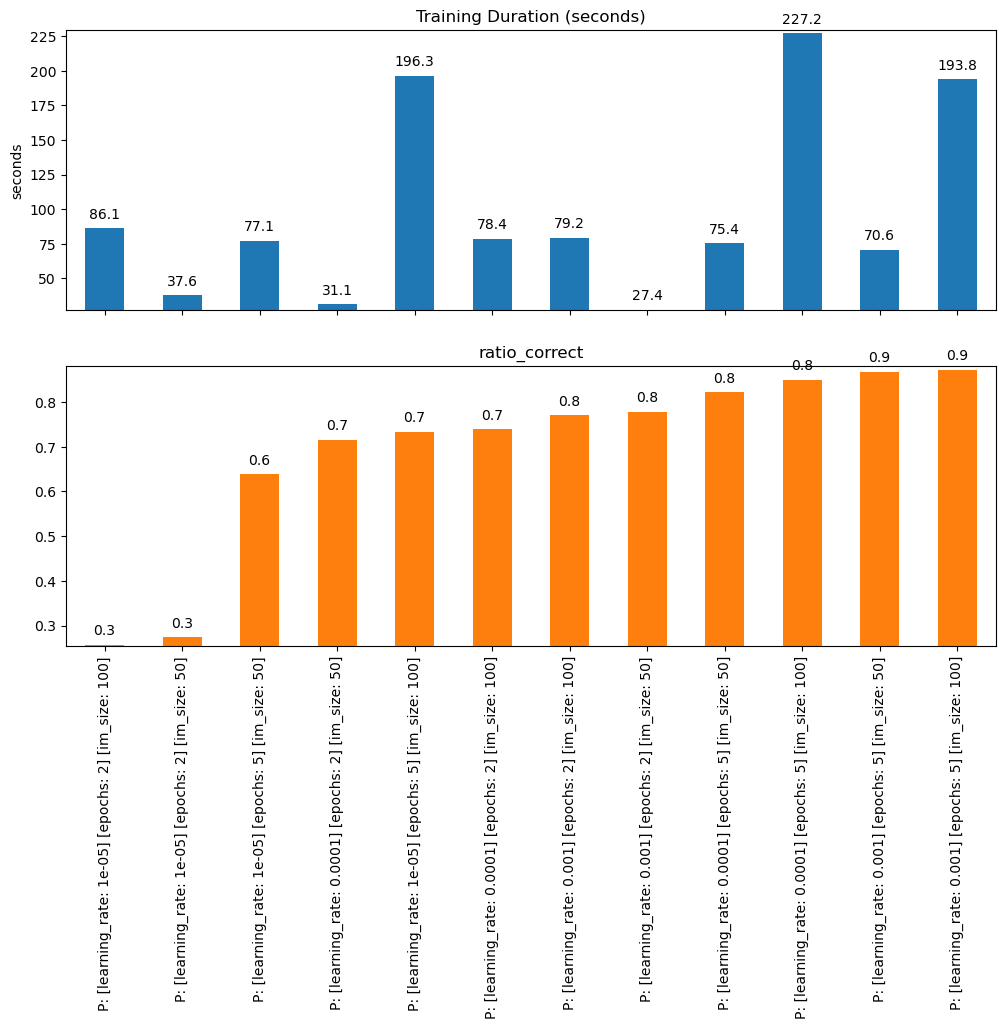

In [11]:
plot_sweeper_df(df.groupby(level=1).mean(), sort_by="ratio_correct")

In [13]:
# Preserve some of the notebook outputs
sb.glue("nr_elements", len(df))
sb.glue("ratio_correct", list(df.groupby(level=1).mean()["ratio_correct"]))
sb.glue("max_duration", df.max().duration)
sb.glue("min_duration", df.min().duration)